# Principal Component Analysis Assignment

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Import the [PitchFX data set](https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv).

In [2]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv')

### Keep only the pitch type and the numeric columns (exluding ID fields).

* Drop any remaining records that contain null values.
* Consider `pitchType` as `y`/target and the remaining columns to be `X`/features.

In [15]:
columns = list(data.select_dtypes(include="number").columns)
columns.append("pitchType")
columns = [x for x in columns if "Id" not in x]
data2 = data[columns].copy()
data2.dtypes

inning                  int64
balls                   int64
strikes                 int64
outs                    int64
timesFaced              int64
probCalledStrike      float64
releaseVelocity       float64
spinRate              float64
spinDir               float64
locationHoriz         float64
locationVert          float64
movementHoriz         float64
movementVert          float64
battedBallAngle       float64
battedBallDistance    float64
pitchType              object
dtype: object

In [4]:

df.isnull().sum() / df.isnull().count()

pitchType             0.000000
inning                0.000000
balls                 0.000000
strikes               0.000000
outs                  0.000000
timesFaced            0.000000
probCalledStrike      0.000125
releaseVelocity       0.000000
spinRate              0.077529
spinDir               0.003891
locationHoriz         0.000000
locationVert          0.000000
movementHoriz         0.000000
movementVert          0.000000
battedBallAngle       0.818606
battedBallDistance    0.818606
dtype: float64

In [16]:
data2.drop(columns=["battedBallAngle", "battedBallDistance"], inplace=True)

data2

,inning,balls,strikes,outs,timesFaced,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,pitchType
2,1,0,2,0,1,0.968,96.5,2127.170,198.816,0.389,2.266,-5.22,9.79,FF
5,1,0,2,1,1,0.321,98.3,2038.060,206.732,-0.206,1.430,-8.30,7.96,FT
8,1,1,1,2,1,0.944,96.3,1909.360,203.540,-0.280,1.990,-6.03,7.98,FF
11,1,1,1,0,1,0.753,92.5,2424.900,140.242,-0.523,1.858,9.10,10.75,FT
23,1,2,2,0,1,0.974,92.1,2319.270,138.209,-0.666,2.667,6.46,9.35,FF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79902,8,1,0,1,1,0.720,84.1,692.172,109.742,0.482,1.579,3.63,1.25,SL
79907,8,1,2,2,1,0.000,84.0,551.530,131.627,1.374,1.263,2.27,1.97,SL
79911,9,0,2,0,1,0.297,87.9,896.178,129.103,0.622,3.149,3.66,2.93,FC
79915,9,1,2,1,1,0.043,86.3,544.542,108.367,1.178,2.103,2.77,0.88,FC


In [17]:
data2.dropna(inplace=True)
data2.isnull().sum() / data2.isnull().count()

inning              0.0
balls               0.0
strikes             0.0
outs                0.0
timesFaced          0.0
probCalledStrike    0.0
releaseVelocity     0.0
spinRate            0.0
spinDir             0.0
locationHoriz       0.0
locationVert        0.0
movementHoriz       0.0
movementVert        0.0
pitchType           0.0
dtype: float64

In [18]:
X = data2.drop("pitchType", axis=1)
y = data2.pitchType

### Reduce the dimensionality of the data using PCA to two components.

Don't forget to scale.

In [20]:
scale = StandardScaler()
X_scale = scale.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scale), columns=["pc0", "pc1"])


### Compute the explained variance for new data set.

In [10]:
pca.explained_variance_

array([2.3860536 , 1.63061626])

### Generate a scatter plot that visualizes how the component values are distributed.

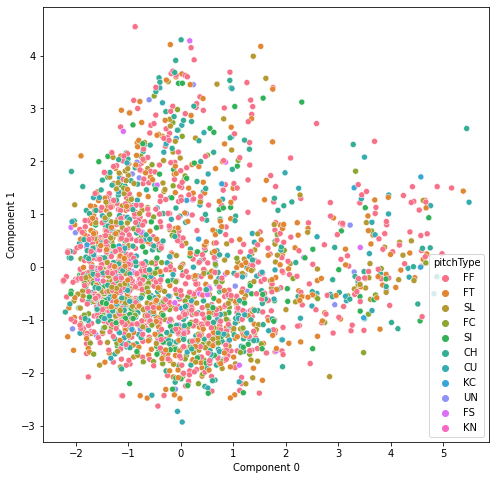

In [21]:

plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_pca.pc0, y=X_pca.pc1, hue=y)
plt.xlabel("Component 0")
plt.ylabel("Component 1")
plt.show()

### Create a line plot that shows the explained variance by number of components.

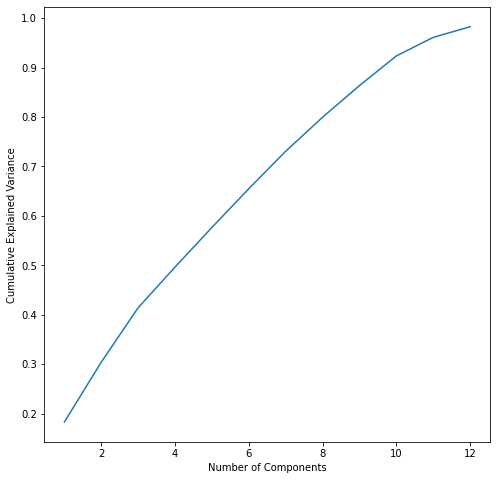

In [22]:
cumulative_variances = []
n_components = list(range(1, len(X.columns)))
for i in n_components:
    pca = PCA(n_components=i)
    pca.fit(X_scale)
    cv = pca.explained_variance_ratio_.sum()
    cumulative_variances.append(cv)

plt.figure(figsize=(8, 8))
plt.plot(n_components, cumulative_variances)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

### Iteratively train and score a Random Forest Classifier (to predict `pitchType`).

* In each iteration:
    * Increase the number of principal components (start with `2`)
    * Store the number of components and model score

In [23]:
model = RandomForestClassifier(max_depth=4, random_state=1)

In [25]:
scores = []
n_components = list(range(1, len(X.columns)))
for i in n_components:
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_scale)
    model.fit(X_pca, y)
    score = model.score(X_pca, y)
    scores.append(score)

### Create a line plot that shows the training scores across the different numbers of principal components.

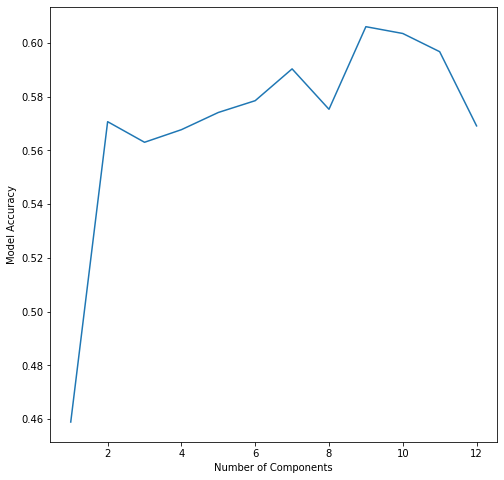

In [26]:
plt.figure(figsize=(8, 8))
plt.plot(n_components, scores)
plt.xlabel("Number of Components")
plt.ylabel("Model Accuracy")
plt.show()

### Based on the analysis you conducted, what is the optimal number of principal components?

In [ ]:
#best number of principal components is 2 with improvement by going to 9 componets